# FW20 Trading System

## FW20 Futures

FW20 futures are standardized financial contracts traded on [the Warsaw Stock Exchange (GPW)](https://www.gpw.pl/en-home), where the underlying asset is the WIG20 index — a benchmark index representing the 20 largest companies on the Polish stock market.

### What Are FW20 Futures?

- FW20 stands for Futures on WIG20.
- These are cash-settled index futures, meaning there's no physical delivery of stocks—just a monetary settlement based on the index value.
- They allow investors to speculate, hedge, or gain leveraged exposure to the Polish equity market.

### Contract Specifications

- **Underlying asset**: WIG20 index
- **Multiplier**: 20 PLN per index point → If the contract is priced at 2,000 points, its nominal value is 40,000 PLN.
- **Settlement**: Cash only, no delivery of shares
- **Expiration months**: March, June, September, December (quarterly cycle)
- **Last trading day**: Third Friday of the expiration month (or the prior session if Friday is a holiday)

### Contract Symbol: FW20EYY20

- **F**: Futures contract
- **W20**: Underlying assest - WIG20 index
- **E**: Expiration month - H (March), M (June), U (September), Z (December)
- **YY**: Year of expiration
- **20**: Multiplier
- **Example**: FW20H2620 indicates futures contract expiring in June 2026

### How They’re Used

- **Speculation**: Traders bet on the direction of the WIG20 index.
- **Hedging**: Investors protect their portfolios against market downturns.
- **Arbitrage**: Exploit price differences between futures and spot markets.
- **Leverage**: Control a large position with relatively small capital.

### Risks

- Futures are highly leveraged, so small index movements can lead to large gains or losses.
- They require margin deposits and are marked-to-market daily.
- Not suitable for beginners without proper risk management.

### More Info

- [GPW's derivative page](https://www.gpw.pl/derivatives)
- [BOSSA's futures education section](https://bossa.pl/edukacja/kontrakty-opcje/kontrakty-terminowe/charakterystyka/kontrakty-na-indeksy) [PL version only]



## EDA

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [145]:
filepath = "data/fw20.csv"
df = pd.read_csv(filepath, parse_dates=['Date'])
df.set_index('Date', inplace=True) # Set 'Date' as the index
df.sort_index(inplace=True) # Ensure data is sorted by date

In [146]:
df.tail()

,Open,High,Low,Close,Volume,Open Interest
Date,,,,,,
2025-09-25,2853,2856,2815,2825,20231,62808.0
2025-09-26,2828,2863,2813,2863,17378,65270.0
2025-09-29,2873,2880,2845,2859,13546,65238.0
2025-09-30,2854,2857,2830,2857,14266,66112.0
2025-10-01,2844,2885,2831,2878,18432,67739.0


In [147]:
df.isnull().sum()

Open             0
High             0
Low              0
Close            0
Volume           0
Open Interest    2
dtype: int64

In [148]:
df['Open Interest'].ffill(inplace=True)
df['Open Interest'] = df['Open Interest'].astype(int)

C:\Users\micha\AppData\Local\Temp\ipykernel_21488\1358777520.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Open Interest'].ffill(inplace=True)


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6932 entries, 1998-01-20 to 2025-10-01
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Open           6932 non-null   int64
 1   High           6932 non-null   int64
 2   Low            6932 non-null   int64
 3   Close          6932 non-null   int64
 4   Volume         6932 non-null   int64
 5   Open Interest  6932 non-null   int64
dtypes: int64(6)
memory usage: 379.1 KB


In [150]:
# calculate ATR
short_window = 2
long_window = 14

df['Prev_Close'] = df['Close'].shift(1).bfill().astype(int)
df['H-L'] = (df['High'] - df['Low']).astype(int)
df['H-PC'] = abs(df['High'] - df['Prev_Close']).astype(int)
df['L-PC'] = abs(df['Low'] - df['Prev_Close']).astype(int)
df['TR'] = df[['H-L', 'H-PC', 'L-PC']].max(axis=1)
df['ATR_short'] = df['TR'].rolling(window=short_window).mean()
df['ATR_long'] = df['TR'].rolling(window=long_window).mean()

In [151]:
df.head()


,Open,High,Low,Close,Volume,Open Interest,Prev_Close,H-L,H-PC,L-PC,TR,ATR_short,ATR_long
Date,,,,,,,,,,,,,
1998-01-20,1440,1440,1440,1440,4,12,1440,0,0,0,0,NaN,NaN
1998-01-22,1370,1370,1370,1370,9,21,1440,0,70,70,70,35.0,NaN
1998-01-23,1370,1370,1370,1370,2,22,1370,0,0,0,0,35.0,NaN
1998-01-28,1382,1390,1382,1389,8,9,1370,8,20,12,20,10.0,NaN
1998-01-29,1417,1417,1412,1412,4,21,1389,5,28,23,28,24.0,NaN


In [152]:
df.tail()

,Open,High,Low,Close,Volume,Open Interest,Prev_Close,H-L,H-PC,L-PC,TR,ATR_short,ATR_long
Date,,,,,,,,,,,,,
2025-09-25,2853,2856,2815,2825,20231,62808,2861,41,5,46,46,53.0,45.285714
2025-09-26,2828,2863,2813,2863,17378,65270,2825,50,38,12,50,48.0,44.500000
2025-09-29,2873,2880,2845,2859,13546,65238,2863,35,17,18,35,42.5,43.714286
2025-09-30,2854,2857,2830,2857,14266,66112,2859,27,2,29,29,32.0,40.357143
2025-10-01,2844,2885,2831,2878,18432,67739,2857,54,28,26,54,41.5,40.071429


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6932 entries, 1998-01-20 to 2025-10-01
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           6932 non-null   int64  
 1   High           6932 non-null   int64  
 2   Low            6932 non-null   int64  
 3   Close          6932 non-null   int64  
 4   Volume         6932 non-null   int64  
 5   Open Interest  6932 non-null   int64  
 6   Prev_Close     6932 non-null   int64  
 7   H-L            6932 non-null   int64  
 8   H-PC           6932 non-null   int64  
 9   L-PC           6932 non-null   int64  
 10  TR             6932 non-null   int64  
 11  ATR_short      6931 non-null   float64
 12  ATR_long       6919 non-null   float64
dtypes: float64(2), int64(11)
memory usage: 758.2 KB


In [154]:
# generate signals
signal_adj = 0.6

df['Signal'] = (df['ATR_short'] * signal_adj).bfill().astype(int)
df['Buy_Level'] = (df['Open'] + df['Signal'].shift(1)).astype(float)
df['Sell_Level'] = (df['Open'] - df['Signal'].shift(1)).astype(float)

# Define entry conditions
df['Long_Entry'] = (df['High'] > df['Buy_Level']) & df['Buy_Level'].notna()
df['Short_Entry'] = (df['Low'] < df['Sell_Level']) & df['Sell_Level'].notna()

# --- Simulate Trades ---
# Initialize position: 1 = long, -1 = short, 0 = flat
position = []
entry_price = []
current_pos = 0  # 1 = long, -1 = short, 0 = flat
last_entry = np.nan

for i in range(len(df)):
    long_signal = df['Long_Entry'].iloc[i]
    short_signal = df['Short_Entry'].iloc[i]

    if current_pos == 0:
        if long_signal:
            current_pos = 1
            last_entry = df['Buy_Level'].iloc[i]
        elif short_signal:
            current_pos = -1
            last_entry = df['Sell_Level'].iloc[i]

    elif current_pos == 1:
        if short_signal:
            current_pos = -1
            last_entry = df['Sell_Level'].iloc[i]

    elif current_pos == -1:
        if long_signal:
            current_pos = 1
            last_entry = df['Buy_Level'].iloc[i]

    position.append(current_pos)
    entry_price.append(last_entry)

df['Position'] = position
df['Entry_Price'] = entry_price

In [155]:
df.tail()

,Open,High,Low,Close,Volume,Open Interest,Prev_Close,H-L,H-PC,L-PC,TR,ATR_short,ATR_long,Signal,Buy_Level,Sell_Level,Long_Entry,Short_Entry,Position,Entry_Price
Date,,,,,,,,,,,,,,,,,,,,
2025-09-25,2853,2856,2815,2825,20231,62808,2861,41,5,46,46,53.0,45.285714,31,2880.0,2826.0,False,True,-1,2803.0
2025-09-26,2828,2863,2813,2863,17378,65270,2825,50,38,12,50,48.0,44.500000,28,2859.0,2797.0,True,False,1,2859.0
2025-09-29,2873,2880,2845,2859,13546,65238,2863,35,17,18,35,42.5,43.714286,25,2901.0,2845.0,False,False,1,2859.0
2025-09-30,2854,2857,2830,2857,14266,66112,2859,27,2,29,29,32.0,40.357143,19,2879.0,2829.0,False,False,1,2859.0
2025-10-01,2844,2885,2831,2878,18432,67739,2857,54,28,26,54,41.5,40.071429,24,2863.0,2825.0,True,False,1,2859.0


In [158]:
# --- Calculate PnL ---
# Create columns to store results
df['Daily_PnL'] = np.nan  # Actual PnL on the entry day (close - entry)

# Loop through rows
for i in range(1, len(df)):
    prev_pos = df['Position'].iloc[i - 1]
    curr_pos = df['Position'].iloc[i]
    curr_close = df['Close'].iloc[i]
    prev_close = df['Close'].iloc[i - 1]
    entry_price = df['Entry_Price'].iloc[i]

     # Case 1: Position flipped (e.g. Long → Short or Short → Long)
    if curr_pos != prev_pos and curr_pos != 0:
        df.at[df.index[i], 'Daily_PnL'] = ((entry_price - prev_close) * prev_pos) + ((curr_close - entry_price) * curr_pos)

    # Case 2: New position opened from flat
    elif prev_pos == 0 and curr_pos != 0:
        df.at[df.index[i], 'Daily_PnL'] = (curr_close - entry_price) * curr_pos

    # Case 3: Holding position
    elif curr_pos == prev_pos and curr_pos != 0 and prev_pos != 0:
        df.at[df.index[i], 'Daily_PnL'] = (curr_close - prev_close) * curr_pos

# Calculate cumulative PnL
df['Cumulative_PnL'] = df['Daily_PnL'].cumsum()


In [159]:
df.tail(10)

,Open,High,Low,Close,Volume,Open Interest,Prev_Close,H-L,H-PC,L-PC,...,ATR_long,Signal,Buy_Level,Sell_Level,Long_Entry,Short_Entry,Position,Entry_Price,Daily_PnL,Cumulative_PnL
Date,,,,,,,,,,,,,,,,,,,,,
2025-09-18,2826,2835,2806,2807,46067,73377,2812,29,23,6,...,54.214286,17,2854.0,2798.0,False,False,-1,2853.0,5.0,15649.0
2025-09-19,2816,2839,2811,2814,18617,74630,2807,28,32,4,...,50.142857,18,2833.0,2799.0,True,False,1,2833.0,-45.0,15604.0
2025-09-22,2814,2815,2786,2815,17994,62087,2814,29,1,28,...,48.000000,18,2832.0,2796.0,False,True,-1,2796.0,-37.0,15567.0
2025-09-23,2825,2847,2820,2828,16638,63186,2815,27,32,5,...,47.357143,18,2843.0,2807.0,True,False,1,2843.0,-43.0,15524.0
2025-09-24,2821,2861,2801,2861,21256,63789,2828,60,33,27,...,46.071429,27,2839.0,2803.0,True,True,-1,2803.0,-83.0,15441.0
2025-09-25,2853,2856,2815,2825,20231,62808,2861,41,5,46,...,45.285714,31,2880.0,2826.0,False,True,-1,2803.0,36.0,15477.0
2025-09-26,2828,2863,2813,2863,17378,65270,2825,50,38,12,...,44.500000,28,2859.0,2797.0,True,False,1,2859.0,-30.0,15447.0
2025-09-29,2873,2880,2845,2859,13546,65238,2863,35,17,18,...,43.714286,25,2901.0,2845.0,False,False,1,2859.0,-4.0,15443.0
2025-09-30,2854,2857,2830,2857,14266,66112,2859,27,2,29,...,40.357143,19,2879.0,2829.0,False,False,1,2859.0,-2.0,15441.0


<Axes: title={'center': 'Cumulative PnL Over Time'}, xlabel='Date'>

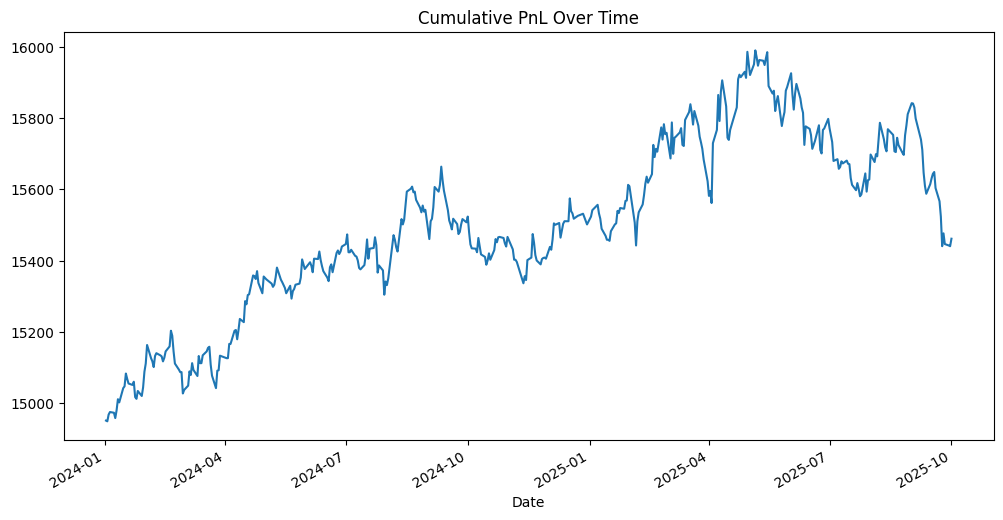

In [162]:
df.loc[df.index > '2024-01-01', 'Cumulative_PnL'].plot(title='Cumulative PnL Over Time', figsize=(12, 6))